IMPORT DATA

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_data.csv")

DATA OVERVIEW

In [297]:
print("Data Head:")
print(df.head())

print("\nData Tail:")
print(df.tail())

Data Head:
   houseId  length  lengthUnit  width   widthUnit  isCarport           price  \
0        1      20       meter     10       meter          1   IDR 5 Billion   
1        2      40       meter     20       meter          0  IDR 18 Billion   
2        3    3000  centimeter   2000  centimeter          1  IDR 13 Billion   
3        4    1000  centimeter   3000  centimeter          0   IDR 6 Billion   
4        5      20       meter     50       meter          1  IDR 21 Billion   

           notes  
0  TRAINING DATA  
1  TRAINING DATA  
2  TRAINING DATA  
3  TRAINING DATA  
4  TRAINING DATA  

Data Tail:
   houseId  length lengthUnit  width widthUnit  isCarport           price  \
5        6      50      meter     10     meter          0  IDR 11 Billion   
6        7      20      meter     20     meter          1   IDR 8 Billion   
7        8      50      meter     20     meter          0  IDR 15 Billion   
8        9      20      meter     30     meter          1  IDR 13 Billion 

GENERAL INFORMATION

In [298]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   houseId     10 non-null     int64 
 1   length      10 non-null     int64 
 2   lengthUnit  10 non-null     object
 3   width       10 non-null     int64 
 4   widthUnit   10 non-null     object
 5   isCarport   10 non-null     int64 
 6   price       10 non-null     object
 7   notes       10 non-null     object
dtypes: int64(4), object(4)
memory usage: 772.0+ bytes
None


In [299]:
print("\nData Describe (Numeric Columns):")
print(df.describe())


Data Describe (Numeric Columns):
        houseId       length        width  isCarport
count  10.00000    10.000000    10.000000  10.000000
mean    5.50000   423.000000   518.000000   0.500000
std     3.02765   955.627194  1070.926909   0.527046
min     1.00000    10.000000    10.000000   0.000000
25%     3.25000    20.000000    20.000000   0.000000
50%     5.50000    30.000000    20.000000   0.500000
75%     7.75000    50.000000    45.000000   1.000000
max    10.00000  3000.000000  3000.000000   1.000000


CHECK DUPLICATION

In [300]:
duplicate_ids = df[df.duplicated(subset=['houseId'], keep=False)]
if not duplicate_ids.empty:
    print("\There are duplicate houseId entries:")
    print(duplicate_ids)
else:
    print("\nNo duplicate houseId entries found.")


No duplicate houseId entries found.


<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\User\AppData\Local\Temp\ipykernel_11892\2011155508.py:3: SyntaxWarning: invalid escape sequence '\T'
  print("\There are duplicate houseId entries:")


CHECK UNIQUE VALUE IN CATEGORICAL

In [301]:
print("\nUnique lengthUnit values:", df['lengthUnit'].unique())
print("Unique widthUnit values:", df['widthUnit'].unique())
print("Unique notes values:", df['notes'].unique())


Unique lengthUnit values: ['meter' 'centimeter']
Unique widthUnit values: ['meter' 'centimeter']
Unique notes values: ['TRAINING DATA' 'TEST DATA' 'VALIDATION DATA']


EXAMINE DISTRIBUTION AND VALUE FORMAT

In [302]:
print("\nValue counts of isCarport:")
print(df['isCarport'].value_counts())

print("\nSample of price column:")
print(df['price'].head())


Value counts of isCarport:
isCarport
1    5
0    5
Name: count, dtype: int64

Sample of price column:
0     IDR 5 Billion
1    IDR 18 Billion
2    IDR 13 Billion
3     IDR 6 Billion
4    IDR 21 Billion
Name: price, dtype: object


DATA CLEANSING

In [303]:
def convert_to_meters(value, unit):
    if unit.lower() == 'meter':
        return value
    elif unit.lower() == 'centimeter':
        return value / 100.0
    else:
        raise ValueError(f"Unknown unit: {unit}")

df['length'] = df.apply(lambda row: convert_to_meters(row['length'], row['lengthUnit']), axis=1)
df['width'] = df.apply(lambda row: convert_to_meters(row['width'], row['widthUnit']), axis=1)
df.drop(['lengthUnit', 'widthUnit'], axis=1, inplace=True)

In [304]:
print(df['length'])
print(df['width'])

0    20.0
1    40.0
2    30.0
3    10.0
4    20.0
5    50.0
6    20.0
7    50.0
8    20.0
9    10.0
Name: length, dtype: float64
0    10.0
1    20.0
2    20.0
3    30.0
4    50.0
5    10.0
6    20.0
7    20.0
8    30.0
9    20.0
Name: width, dtype: float64


In [305]:
def convert_price_to_billion(price_str):
    clean_str = price_str.replace("IDR", "").replace("Billion", "").strip()
    return float(f"{clean_str}000000")

df['price'] = df['price'].apply(convert_price_to_billion)

df['isCarport'] = df['isCarport'].astype(int)

In [306]:
print(df['price'])
print(df['isCarport'])

0     5000000.0
1    18000000.0
2    13000000.0
3     6000000.0
4    21000000.0
5    11000000.0
6     8000000.0
7    15000000.0
8    13000000.0
9    11000000.0
Name: price, dtype: float64
0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: isCarport, dtype: int64


QA

In [307]:
critical_columns = ['houseId', 'length', 'width', 'isCarport', 'price']
missing_data = df[critical_columns].isna().sum()
print("\nMissing values in critical columns after cleaning:")
print(missing_data)


Missing values in critical columns after cleaning:
houseId      0
length       0
width        0
isCarport    0
price        0
dtype: int64


In [308]:
print("\nRanges of key numeric fields:")
print("Length range:", df['length'].min(), "-", df['length'].max())
print("Width range:", df['width'].min(), "-", df['width'].max())
print("Price range (in Billion IDR):", df['price'].min(), "-", df['price'].max())


Ranges of key numeric fields:
Length range: 10.0 - 50.0
Width range: 10.0 - 50.0
Price range (in Billion IDR): 5000000.0 - 21000000.0


In [309]:
if all(df['isCarport'].isin([0,1])):
    print("\nisCarport column verified as binary 0/1.")
else:
    print("\nWarning: isCarport contains values other than 0/1.")


isCarport column verified as binary 0/1.


In [310]:
print("\nCount of TRAINING vs TEST data in notes:")
print(df['notes'].value_counts())

print("\nCleaned data preview:")
print(df.head())


Count of TRAINING vs TEST data in notes:
notes
TRAINING DATA      5
VALIDATION DATA    3
TEST DATA          2
Name: count, dtype: int64

Cleaned data preview:
   houseId  length  width  isCarport       price          notes
0        1    20.0   10.0          1   5000000.0  TRAINING DATA
1        2    40.0   20.0          0  18000000.0  TRAINING DATA
2        3    30.0   20.0          1  13000000.0  TRAINING DATA
3        4    10.0   30.0          0   6000000.0  TRAINING DATA
4        5    20.0   50.0          1  21000000.0  TRAINING DATA


FEATURE ENGINEERING

In [311]:
df['area'] = df['length'] * df['width']

df['price_per_sqm'] = (df['price']) / df['area']

print(df[['houseId', 'length', 'width', 'area', 'price', 'price_per_sqm']].head())

   houseId  length  width    area       price  price_per_sqm
0        1    20.0   10.0   200.0   5000000.0   25000.000000
1        2    40.0   20.0   800.0  18000000.0   22500.000000
2        3    30.0   20.0   600.0  13000000.0   21666.666667
3        4    10.0   30.0   300.0   6000000.0   20000.000000
4        5    20.0   50.0  1000.0  21000000.0   21000.000000


In [312]:
df['aspect_ratio'] = df['length'] / df['width']
print(df['aspect_ratio'])

0    2.000000
1    2.000000
2    1.500000
3    0.333333
4    0.400000
5    5.000000
6    1.000000
7    2.500000
8    0.666667
9    0.500000
Name: aspect_ratio, dtype: float64


In [313]:
def categorize_size(area):
    if area < 500: 
        return "Small"
    elif area < 1000:
        return "Medium"
    else:
        return "Large"

df['size_category'] = df['area'].apply(categorize_size)
df['size_category'] = df['size_category'].astype('category')
df['size_category']

0     Small
1    Medium
2    Medium
3     Small
4     Large
5    Medium
6     Small
7     Large
8    Medium
9     Small
Name: size_category, dtype: category
Categories (3, object): ['Large', 'Medium', 'Small']

In [314]:
def categorize_price(price_billion):
    if price_billion <= 10000000:
        return "Budget"
    elif price_billion <= 15000000:
        return "Mid"
    else:
        return "Premium"

df['price_segment'] = df['price'].apply(categorize_price)
df['price_segment'] = df['price_segment'].astype('category')
df['price_segment']

0     Budget
1    Premium
2        Mid
3     Budget
4    Premium
5        Mid
6     Budget
7        Mid
8        Mid
9        Mid
Name: price_segment, dtype: category
Categories (3, object): ['Budget', 'Mid', 'Premium']

New Feature Examination

In [315]:
print("\nArea Feature Overview:")
print("Mean area:", df['area'].mean())
print("Median area:", df['area'].median())
print("Min area:", df['area'].min())
print("Max area:", df['area'].max())

print("\nAspect Ratio Overview:")
print("Mean aspect_ratio:", df['aspect_ratio'].mean())
print("Median aspect_ratio:", df['aspect_ratio'].median())
print("Min aspect_ratio:", df['aspect_ratio'].min())
print("Max aspect_ratio:", df['aspect_ratio'].max())

print("\nPrice per Square Meter Overview (IDR):")
print("Mean price_per_sqm:", df['price_per_sqm'].mean())
print("Median price_per_sqm:", df['price_per_sqm'].median())
print("Min price_per_sqm:", df['price_per_sqm'].min())
print("Max price_per_sqm:", df['price_per_sqm'].max())

print("\nSize Category Counts:")
print(df['size_category'].value_counts())

print("\nPrice Segment Counts:")
print(df['price_segment'].value_counts())

print("\nCorrelation with Price:")
corr_matrix = df[['price', 'area', 'aspect_ratio', 'price_per_sqm']].corr()
print(corr_matrix['price'].sort_values(ascending=False))


Area Feature Overview:
Mean area: 560.0
Median area: 550.0
Min area: 200.0
Max area: 1000.0

Aspect Ratio Overview:
Mean aspect_ratio: 1.59
Median aspect_ratio: 1.25
Min aspect_ratio: 0.3333333333333333
Max aspect_ratio: 5.0

Price per Square Meter Overview (IDR):
Mean price_per_sqm: 24383.333333333336
Median price_per_sqm: 21666.666666666668
Min price_per_sqm: 15000.0
Max price_per_sqm: 55000.0

Size Category Counts:
size_category
Medium    4
Small     4
Large     2
Name: count, dtype: int64

Price Segment Counts:
price_segment
Mid        5
Budget     3
Premium    2
Name: count, dtype: int64

Correlation with Price:
price            1.000000
area             0.876323
aspect_ratio    -0.028139
price_per_sqm   -0.127109
Name: price, dtype: float64


Descriptive Statics

In [316]:
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())


Descriptive Statistics for Numeric Columns:
        houseId     length      width  isCarport         price         area  \
count  10.00000  10.000000  10.000000  10.000000  1.000000e+01    10.000000   
mean    5.50000  27.000000  23.000000   0.500000  1.210000e+07   560.000000   
std     3.02765  14.944341  11.595018   0.527046  5.065131e+06   298.886824   
min     1.00000  10.000000  10.000000   0.000000  5.000000e+06   200.000000   
25%     3.25000  20.000000  20.000000   0.000000  8.750000e+06   325.000000   
50%     5.50000  20.000000  20.000000   0.500000  1.200000e+07   550.000000   
75%     7.75000  37.500000  27.500000   1.000000  1.450000e+07   750.000000   
max    10.00000  50.000000  50.000000   1.000000  2.100000e+07  1000.000000   

       price_per_sqm  aspect_ratio  
count      10.000000     10.000000  
mean    24383.333333      1.590000  
std     11053.754739      1.421445  
min     15000.000000      0.333333  
25%     20250.000000      0.541667  
50%     21666.666667 

In [317]:
numeric_features = ['length', 'width', 'area', 'price', 'price_per_sqm', 'aspect_ratio']
print("\nSkewness of Numeric Features:")
print(df[numeric_features].skew())

print("\nKurtosis of Numeric Features:")
print(df[numeric_features].kurt())

quantiles = [0.01, 0.05, 0.25, 0.75, 0.95, 0.99]
print("\nSelected Quantiles for Numeric Features:")
print(df[numeric_features].quantile(quantiles))

print("\nDescriptive Statistics by isCarport:")
print(df.groupby('isCarport')[numeric_features].describe())

print("\nDescriptive Statistics by size_category:")
print(df.groupby('size_category')[numeric_features].describe())

print("\nCross-Tabulation of size_category and price_segment:")
print(pd.crosstab(df['size_category'], df['price_segment']))

print("\nCross-Tabulation of isCarport and price_segment:")
print(pd.crosstab(df['isCarport'], df['price_segment']))

cv = df[numeric_features].std() / df[numeric_features].mean()
print("\nCoefficient of Variation for Numeric Features:")
print(cv)

print("\nFull Correlation Matrix of Numeric Features:")
print(df[numeric_features].corr())

outlier_threshold = 3
outlier_counts = {}
for feature in numeric_features:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    outliers = df[(df[feature] < mean_val - outlier_threshold*std_val) | 
                  (df[feature] > mean_val + outlier_threshold*std_val)]
    outlier_counts[feature] = len(outliers)

print("\nCount of Potential Outliers per Feature (3-STD Rule):")
print(outlier_counts)



Skewness of Numeric Features:
length           0.639188
width            1.411264
area             0.359543
price            0.298964
price_per_sqm    2.838847
aspect_ratio     1.672506
dtype: float64

Kurtosis of Numeric Features:
length          -0.991949
width            2.830310
area            -1.136349
price           -0.436737
price_per_sqm    8.634608
aspect_ratio     3.290423
dtype: float64

Selected Quantiles for Numeric Features:
      length  width    area       price  price_per_sqm  aspect_ratio
0.01    10.0   10.0   200.0   5090000.0        15450.0      0.339333
0.05    10.0   10.0   200.0   5450000.0        17250.0      0.363333
0.25    20.0   20.0   325.0   8750000.0        20250.0      0.541667
0.75    37.5   27.5   750.0  14500000.0        22375.0      2.000000
0.95    50.0   41.0  1000.0  19650000.0        41500.0      3.875000
0.99    50.0   48.2  1000.0  20730000.0        52300.0      4.775000

Descriptive Statistics by isCarport:
          length                 

C:\Users\User\AppData\Local\Temp\ipykernel_11892\942228612.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('size_category')[numeric_features].describe())


Visualization

In [318]:
sns.set_style('whitegrid')

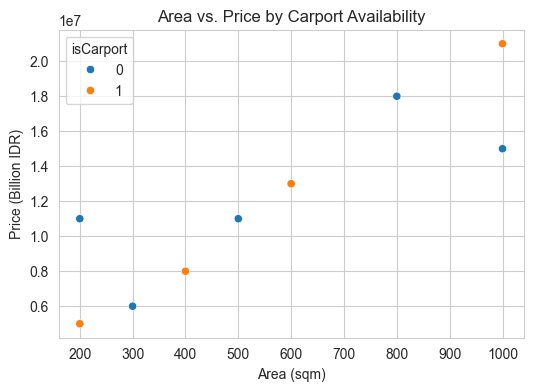

In [319]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='area', y='price', hue='isCarport')
plt.title('Area vs. Price by Carport Availability')
plt.xlabel('Area (sqm)')
plt.ylabel('Price (Billion IDR)')
plt.show()


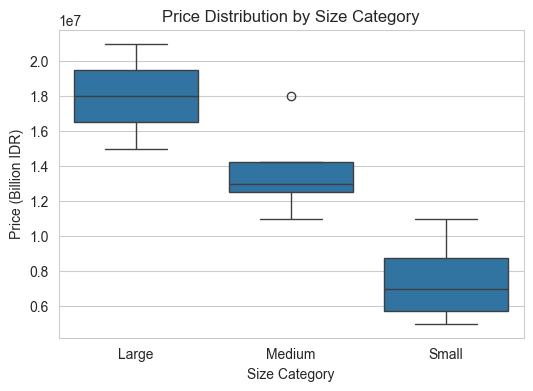

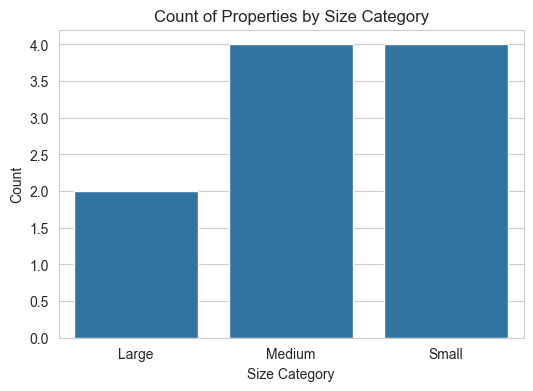

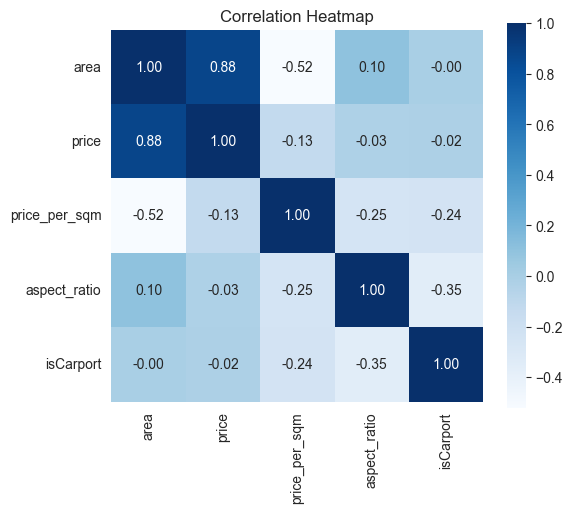

In [320]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='size_category', y='price')
plt.title('Price Distribution by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Price (Billion IDR)')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='size_category')
plt.title('Count of Properties by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

corr = df[['area', 'price', 'price_per_sqm', 'aspect_ratio', 'isCarport']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [321]:
display(df)

,houseId,length,width,isCarport,price,notes,area,price_per_sqm,aspect_ratio,size_category,price_segment
0,1,20.0,10.0,1,5000000.0,TRAINING DATA,200.0,25000.000000,2.000000,Small,Budget
1,2,40.0,20.0,0,18000000.0,TRAINING DATA,800.0,22500.000000,2.000000,Medium,Premium
2,3,30.0,20.0,1,13000000.0,TRAINING DATA,600.0,21666.666667,1.500000,Medium,Mid
3,4,10.0,30.0,0,6000000.0,TRAINING DATA,300.0,20000.000000,0.333333,Small,Budget
4,5,20.0,50.0,1,21000000.0,TRAINING DATA,1000.0,21000.000000,0.400000,Large,Premium
5,6,50.0,10.0,0,11000000.0,TEST DATA,500.0,22000.000000,5.000000,Medium,Mid
6,7,20.0,20.0,1,8000000.0,TEST DATA,400.0,20000.000000,1.000000,Small,Budget
7,8,50.0,20.0,0,15000000.0,VALIDATION DATA,1000.0,15000.000000,2.500000,Large,Mid
8,9,20.0,30.0,1,13000000.0,VALIDATION DATA,600.0,21666.666667,0.666667,Medium,Mid
9,10,10.0,20.0,0,11000000.0,VALIDATION DATA,200.0,55000.000000,0.500000,Small,Mid


In [324]:
import pandas as pd
import numpy as np
import re

data = {
    'houseId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'length': [20, 40, 3000, 1000, 20, 50, 20, 50, 20, 10],
    'lengthUnit': ['meter', 'meter', 'centimeter', 'centimeter', 'meter', 'meter', 'meter', 'meter', 'meter', 'meter'],
    'width': [10, 20, 2000, 3000, 50, 10, 20, 20, 30, 20],
    'widthUnit': ['meter', 'meter', 'centimeter', 'centimeter', 'meter', 'meter', 'meter', 'meter', 'meter', 'meter'],
    'isCarport': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'price': ['5 Billion', '18 Billion', '13 Billion', '6 Billion', '21 Billion', '11 Billion', '8 Billion',
              'IDR 15 Billion', 'IDR 13 Billion', 'IDR 11 Billion'],
    'notes': ['TRAINING DATA', 'TRAINING DATA', 'TRAINING DATA', 'TRAINING DATA',
              'TRAINING DATA', 'TEST DATA', 'TEST DATA',
              'VALIDATION DATA', 'VALIDATION DATA', 'VALIDATION DATA']
}

df = pd.DataFrame(data)

def convert_price(p_str):
    match = re.search(r'(\d+(\.\d+)?)', p_str)
    if match:
        return float(match.group(1))
    else:
        raise ValueError(f"Cannot parse price from '{p_str}'")

df['price_val'] = df['price'].apply(convert_price)

def to_meters(value, unit):
    if unit == 'meter':
        return value
    elif unit == 'centimeter':
        return value / 100.0
    else:
        raise ValueError(f"Unknown unit: {unit}")

df['length_m'] = [to_meters(l, u) for l, u in zip(df['length'], df['lengthUnit'])]
df['width_m'] = [to_meters(w, u) for w, u in zip(df['width'], df['widthUnit'])]

def size_category(price):
    if price <= 10:
        return 'budget'
    elif price <= 15:
        return 'mid'
    else:
        return 'large'

df['size_category'] = df['price_val'].apply(size_category)

train_df = df[df['notes'] == 'TRAINING DATA'].copy()
test_df = df[df['notes'] == 'TEST DATA'].copy()
validation_df = df[df['notes'] == 'VALIDATION DATA'].copy()

for dataset in [train_df, test_df, validation_df]:
    dataset['mid'] = (dataset['size_category'] == 'mid').astype(int)
    dataset['large'] = (dataset['size_category'] == 'large').astype(int)

feature_columns = ['length_m', 'width_m', 'isCarport', 'mid', 'large']

X_train = train_df[feature_columns].values
y_train = train_df['price_val'].values

X_test = test_df[feature_columns].values
y_test = test_df['price_val'].values

X_val = validation_df[feature_columns].values
y_val = validation_df['price_val'].values

class DecisionTreeRegressorScratch:
    def __init__(self, min_samples_split=2, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree_ = None

    def fit(self, X, y):
        self.tree_ = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(y) < self.min_samples_split or len(set(y)) == 1:
            return {'type': 'leaf', 'value': np.mean(y)}

        feature_idx, threshold, score = self._find_best_split(X, y)
        if feature_idx is None:
            return {'type': 'leaf', 'value': np.mean(y)}

        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        return {
            'type': 'node',
            'feature_idx': feature_idx,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_score = float('inf')

        current_mse = np.mean((y - np.mean(y))**2)

        n_samples, n_features = X.shape
        for f in range(n_features):
            values = np.unique(X[:, f])
            if len(values) == 1:
                continue
            for val in values:
                left_mask = X[:, f] <= val
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]

                left_mse = np.mean((left_y - np.mean(left_y))**2)
                right_mse = np.mean((right_y - np.mean(right_y))**2)

                split_mse = (len(left_y) * left_mse + len(right_y) * right_mse) / n_samples

                if split_mse < best_score:
                    best_score = split_mse
                    best_feature = f
                    best_threshold = val

        if best_score >= current_mse:
            return None, None, current_mse

        return best_feature, best_threshold, best_score

    def predict_one(self, x):
        node = self.tree_
        while node['type'] == 'node':
            if x[node['feature_idx']] <= node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node['value']

    def predict(self, X):
        return np.array([self.predict_one(row) for row in X])

tree_model = DecisionTreeRegressorScratch(min_samples_split=2, max_depth=3)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)
y_val_pred = tree_model.predict(X_val)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

train_mse = mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)
val_mse = mse(y_val, y_val_pred)

print("Training Predictions:", y_train_pred)
print("Test Predictions:", y_test_pred)
print("Validation Predictions:", y_val_pred)

print("\nTraining Metrics:")
print("  MSE:", train_mse)

print("\nTest Metrics:")
print("  MSE:", test_mse)

print("\nValidation Metrics:")
print("  MSE:", val_mse)


Training Predictions: [ 5. 18. 13.  6. 21.]
Test Predictions: [13.  5.]
Validation Predictions: [13.  5.  6.]

Training Metrics:
  MSE: 0.0

Test Metrics:
  MSE: 6.5

Validation Metrics:
  MSE: 31.0


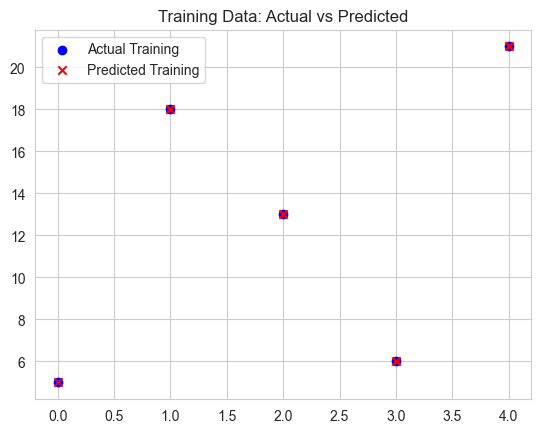

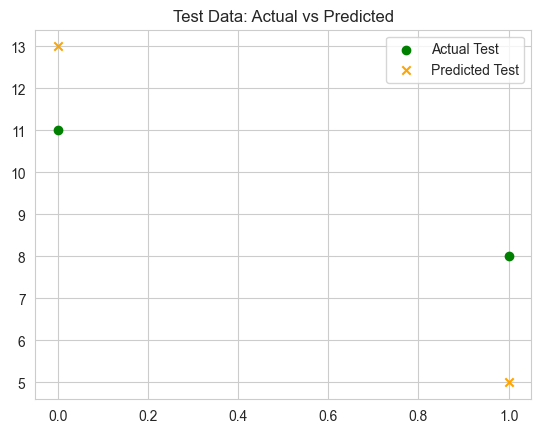

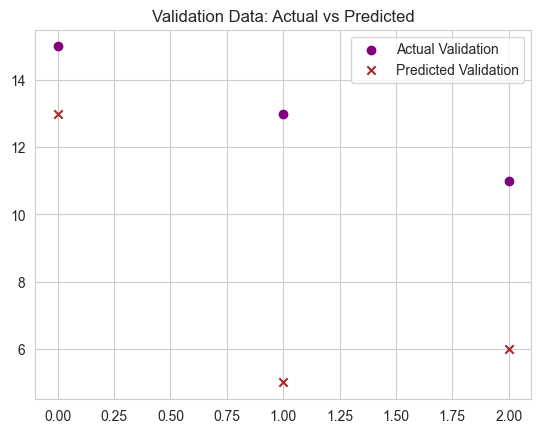

In [325]:
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual Training')
plt.scatter(range(len(y_train_pred)), y_train_pred, color='red', marker='x', label='Predicted Training')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Test')
plt.scatter(range(len(y_test_pred)), y_test_pred, color='orange', marker='x', label='Predicted Test')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.scatter(range(len(y_val)), y_val, color='purple', label='Actual Validation')
plt.scatter(range(len(y_val_pred)), y_val_pred, color='brown', marker='x', label='Predicted Validation')
plt.title('Validation Data: Actual vs Predicted')
plt.legend()
plt.show()